## Module for work with the task of classterisation
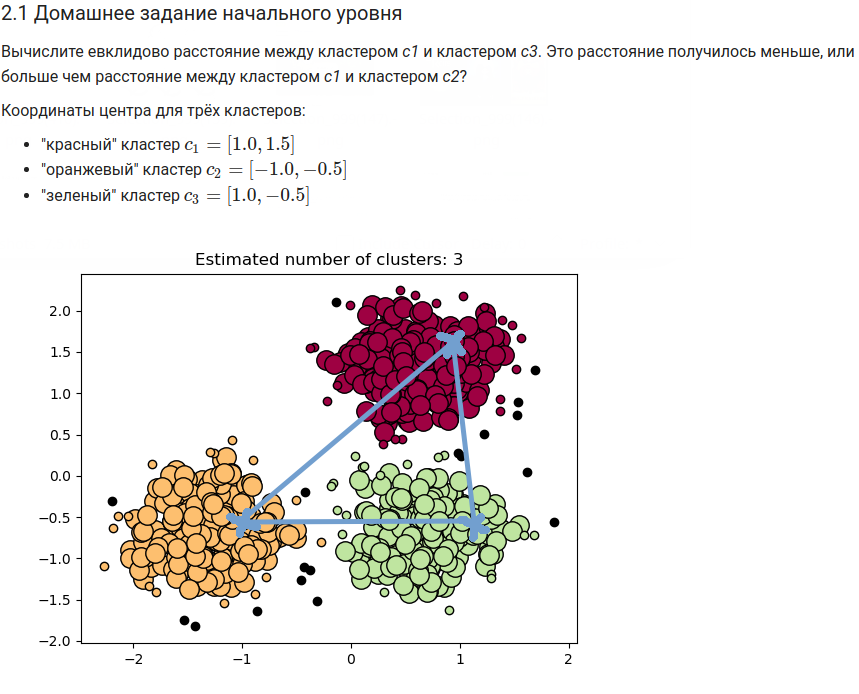

In [6]:
import numpy as np

def euclidean(iter1, iter2):
    return np.sqrt(sum([(iter1[index] - iter2[index])**2 for index in range(len(iter1))]))

In [16]:
# init three clusters
c1 = [1.0, 1.5]
c2 = [-1.0, -0.5]
c3 = [1.0, -.5]

dist_c1_c2 = euclidean(c1, c2)
dist_c1_c3 = euclidean(c1, c3)
print("Distance are between clusters c1 and c2: %.4f" % dist_c1_c2)
print("Distance are between clusters c1 and c3: %.4f" % dist_c1_c3)

Distance are between clusters c1 and c2: 2.8284
Distance are between clusters c1 and c3: 2.0000


In [19]:
dist_c1_c3 < dist_c1_c2
print('the distance between are clusters 1 and 3 less than clusters 1 and 2')

the distance between are clusters 1 and 3 less than clusters 1 and 2


In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [27]:
with open('clustering.pkl', 'rb') as file:
    data_clustering = pickle.load(file)
    
x = data_clustering['X']
y = data_clustering['Y']

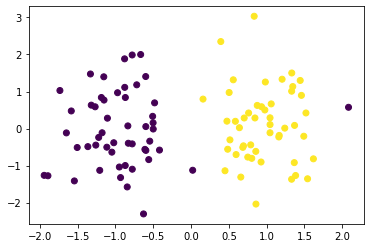

In [32]:
plt.scatter(x[:,0], x[:,1], marker='o', c=y)

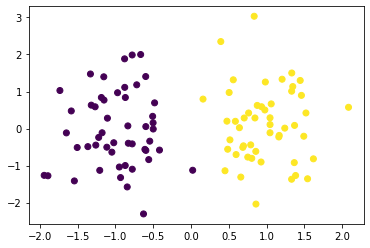

In [37]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2).fit(x)

plt.scatter(x[:, 0], x[:, 1], c=kmeans_model.labels_)

### homework 
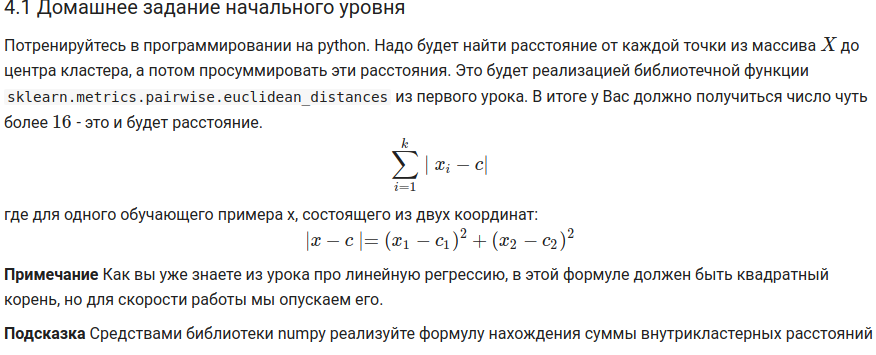

In [38]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

In [76]:
from sklearn.metrics import euclidean_distances
euclidean_distances(clust, [centroid])

array([[0.67627218],
       [0.7903905 ],
       [1.54472119],
       [0.35460782],
       [2.30214499],
       [1.24059857],
       [1.49491969],
       [1.4828237 ],
       [0.43207451],
       [1.12202928]])

In [77]:
def euclidean_distances(X, Y):
    def euclidean(iter1, iter2):
        return np.sqrt(sum([(iter1[index] - iter2[index])**2 for index in range(len(iter1))]))
    return np.sqrt([euclidean(x, Y)**2 for x in X])

In [78]:
euclidean_distances(clust, centroid)

array([0.67627218, 0.7903905 , 1.54472119, 0.35460782, 2.30214499,
       1.24059857, 1.49491969, 1.4828237 , 0.43207451, 1.12202928])